# E-COMMERCE company analysis

The following project is about the analysis of a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. <br>
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."
The aim is to extract useful insights about the customers of the online stores.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [3]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', header= 0, encoding= 'unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

## Data format cleaning

To simplify the further analysis, the columns will be renamed as follows:

In [5]:
df.rename(columns={"InvoiceNo":"invoice_num", 
                   "StockCode":"stock_code", 
                  "Description":"description", 
                  "Quantity":"quantity", 
                  "InvoiceDate":"invoice_date", 
                  "UnitPrice":"unit_price", 
                  "CustomerID":"customer_id", 
                  "Country":"country"}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The column related to the transaction date will be converted from 'object' (a simple string basically) to the very convenient date format "date-time" in pandas.

In [7]:
df['invoice_date']=pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

Moreover, the description column will be converter into lower case.

In [8]:
df['description']=df.description.str.lower()

In [9]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Missing data analysis and handling

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are some null values for description and customer id.<br>
In particular the exact number of missing values in each column is:

In [11]:
df.isnull().sum().sort_values(ascending=False)

customer_id     135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

The portion of dataframe where some values are missing is the following:

In [12]:
df_miss=df[df.isnull().any(axis=1)]
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


## Is there any relationship between the missing data?

In [13]:
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [14]:
df_miss["day"] = df_miss['invoice_date'].map(lambda x: x.day)
df_miss["month"] = df_miss['invoice_date'].map(lambda x: x.month)
df_miss["year"] = df_miss['invoice_date'].map(lambda x: x.year)

In [15]:
df_miss['daymonth']=df_miss['day'].astype(str)+'/'+df_miss['month'].astype(str)
df_miss['daymonthyear']=df_miss['daymonth'].astype(str)+'/'+df_miss['year'].astype(str)
df_miss['monthyear']=df_miss['month'].astype(str)+'/'+df_miss['year'].astype(str)

In [16]:
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,day,month,year,daymonth,daymonthyear,monthyear
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010


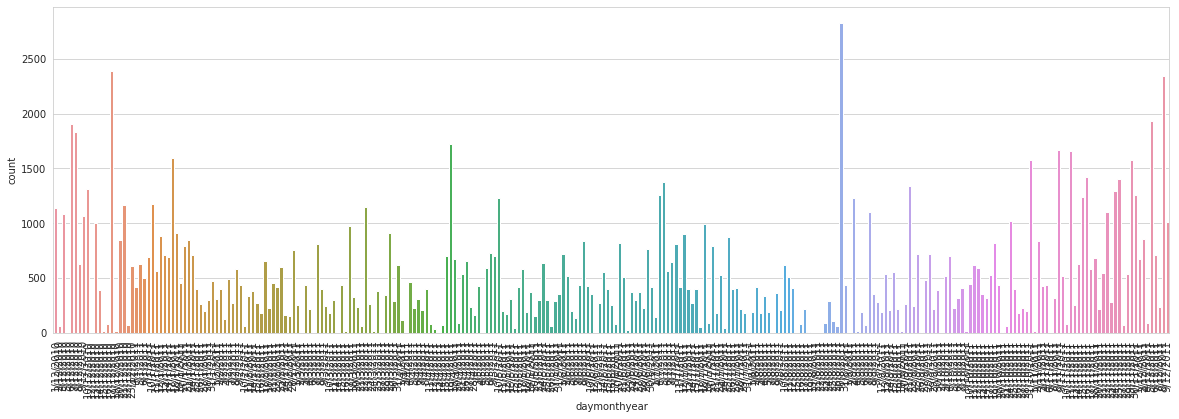

In [17]:
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.countplot(x='daymonthyear', data=df_miss)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

This plot looks messy, but its clear that during some days there have been more missing values than others.<br>
In particular the days with most missing values are:

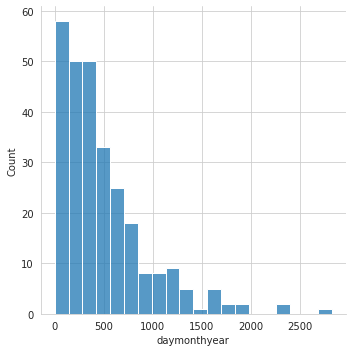

In [18]:
sns.displot(df_miss['daymonthyear'].value_counts())

We can see that during some days, more than 2500 customers_id are missing. We will now check the days where most cusomers id are missing.

In [19]:
df_miss['daymonthyear'].value_counts()[:20]

30/8/2011     2829
17/12/2010    2384
8/12/2011     2341
5/12/2011     1933
6/12/2010     1904
7/12/2010     1830
18/4/2011     1719
8/11/2011     1671
11/11/2011    1656
17/1/2011     1591
29/11/2011    1577
31/10/2011    1576
16/11/2011    1423
25/11/2011    1400
5/7/2011      1375
21/9/2011     1338
10/12/2010    1309
24/11/2011    1293
30/11/2011    1259
4/7/2011      1256
Name: daymonthyear, dtype: int64

It could be interesting to check if during these days something happend and caused the missing values.

For further analysis, the rows with missing values will be dropped and a new df called 'df_new' will be defined

In [20]:
df_new=df.dropna()

In [21]:
#check if there a are missing values in the new dataframe
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Now the dataframe does not have any missing values

## Duplicated Values handling

In [23]:
df_new[df_new.duplicated()].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,union jack flag luggage tag,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [24]:
df_new.duplicated().sum()

5225

There are 5225 duplicated transactions<br>
These transaction will be dropped from the dataset.

In [25]:
df_new.drop_duplicates(inplace=True)

In [26]:
df_new.duplicated().sum()

0

## Change columns type

Next, the 'customer_id' column will be converted to 'int' from 'float' since customersID are integer numbers.

In [27]:
df_new['customer_id']=df_new.customer_id.astype('int64')

In [28]:
df_new.describe()

,quantity,unit_price,customer_id
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Quantity has negative values and unit price has a minimum value of 0

In [29]:
np.sum(df_new['quantity'] < 0)

8872

There are 8872 transactions with negative quantity. We will investigate if they are related to canceled orders or mistakes.

### Canceled orders analysis

In [30]:
canceled_orders = df_new[df_new['invoice_num'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


By analyzing the first 5 values of the dataframe we can see that the quantity has a negative values, is this true for all canceled orders?

In [31]:
(canceled_orders['quantity'] < 0).sum()

8872

Yes, as expetcted all the transactions with negative values are canceled orders.

In [32]:
print('The percentage of canceled orders is: {} %'.format(round(canceled_orders.shape[0]/df_new.shape[0]*100,2)))

The percentage of canceled orders is: 2.21 %


Moreover, it looks like there are some discounts among the canceled orders. They will be analyzed as well.

## Discounts

In [33]:
discounts = df_new[df_new['stock_code'].apply(lambda order: order=='D')]
discounts.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom
19392,C537857,D,discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom
31134,C538897,D,discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom


In [34]:
discounts.shape

(77, 8)

The company issued 77 discounts

Are there other discounts in the original dataset?

In [35]:
df[df['stock_code'].apply(lambda order: order=='D')].shape[0]

77

No, all the discounts are correctly included in the transactions with negative values

Now, all the canceled orders will be dropped.

In [36]:
df_new = df_new[df_new['quantity'] > 0]
df_new.sort_values(by='stock_code', ascending=False, inplace=True)
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 299512 to 30249
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  object        
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  int64         
 7   country       392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


## Check for transactions of special items:

The presence of special items will be checked through a regex

In [38]:
import re
spec_list=[]
for code in df_new.stock_code:
    x=re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", code)
    if x not in spec_list:
        if len(x) >0 :
            spec_list.append(x)
spec_list

[['POST'], ['PADS'], ['M'], ['DOT'], ['C2'], ['BANK ', 'CHARGES']]

['BANK ', 'CHARGES'] will be renamed into ['BANK CHARGES']:

In [39]:
spec_list[5] = ['BANK CHARGES']

Then, the spec_list will be transformed into into a single list:

In [40]:
spec_list2=[item for sublist in spec_list for item in sublist]
spec_list2

['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']

Now it is possible to check all the transactions related to these special items:

In [41]:
df_new[df_new['stock_code'].apply(lambda x: x in spec_list2)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium
...,...,...,...,...,...,...,...,...
327921,565735,BANK CHARGES,bank charges,1,2011-09-06 12:25:00,15.0,16904,United Kingdom
62508,541505,BANK CHARGES,bank charges,1,2011-01-18 15:58:00,15.0,15939,United Kingdom
440745,574546,BANK CHARGES,bank charges,1,2011-11-04 14:59:00,15.0,13651,United Kingdom
506357,579137,BANK CHARGES,bank charges,1,2011-11-28 12:51:00,15.0,14704,United Kingdom


There are so other types of transactions included in the dataset. They will be dropped.<br>
The special transations are: POST ( postage), M ( manual), Bank charges and C2 ( carriage)

In [42]:
df_new = df_new[~df_new['stock_code'].isin(spec_list2)]

In [43]:
print("The number of transactions is: ", df_new.shape[0])

The number of transactions is:  391183


392732-391183=1549 elements have been dropped

# Feature Engineering

We will add a column 'Amount spent'

In [44]:
df_new['amount_spent']=df_new['quantity'] * df_new['unit_price']

In [45]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent
527069,580691,90214Z,"letter ""z"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
193006,553503,90214Y,"letter ""y"" bling key ring",1,2011-05-17 13:20:00,1.25,14606,United Kingdom,1.25
527068,580691,90214Y,"letter ""y"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
532744,580996,90214Y,"letter ""y"" bling key ring",48,2011-12-06 17:18:00,0.29,14578,United Kingdom,13.92
527067,580691,90214W,"letter ""w"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48


We will reorder the columns for easier reference

In [46]:
df_new=df_new[['invoice_num', 'invoice_date', 'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent', 'customer_id', 'country']]

In [47]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


We will create columns for day, month, year

In [48]:
df_new.insert(loc=2, column='yearmonth', value=df_new['invoice_date'].map(lambda x: 100 * x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek) + 
              1) # +1 is used to make Monday=1.....until Sunday=7
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [49]:
df_new.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


Now the dataset looks cleaner and is ready for EDA

# Exploratory Data Analysis (EDA)

## How many orders by the customers?

In [50]:
orders=df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_num'].count()
orders.head()

,customer_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,27
3,12349,Italy,72
4,12350,Norway,16


The column invoice_num has the count of invoice_num for each customer<br>
The equivalent code in SQL would be:<br>
SELECT customer_id, country, count(invoice_num)<br>
FROM df_new<br>
GROUP BY customer_id, country<br>
ORDER BY customer_id;<br>

We will plot the number of order by customer_id

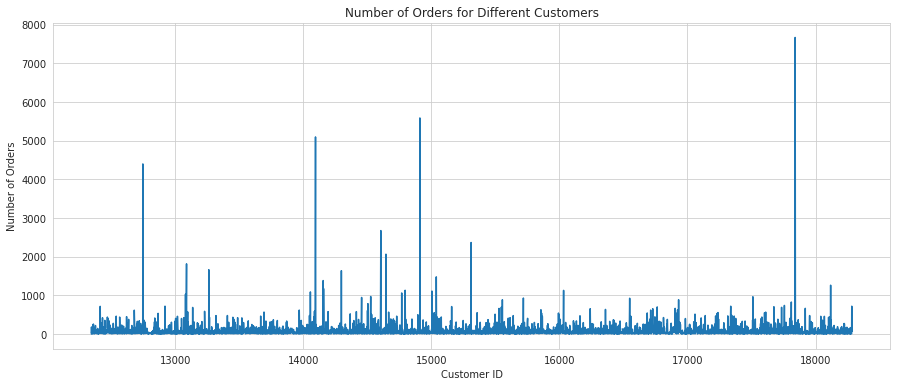

In [51]:
plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id, orders.invoice_num)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

### The TOP 5 most number of orders is:

In [52]:
orders.sort_values(by='invoice_num', ascending=False).head()

,customer_id,country,invoice_num
4016,17841,United Kingdom,7667
1888,14911,EIRE,5586
1298,14096,United Kingdom,5095
334,12748,United Kingdom,4397
1670,14606,United Kingdom,2674


## How much money spent by the customers?

In [53]:
money_spent = df_new.groupby(by=['customer_id','country'], as_index=False)['amount_spent'].sum()
money_spent.head()

,customer_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1437.24
3,12349,Italy,1457.55
4,12350,Norway,294.40


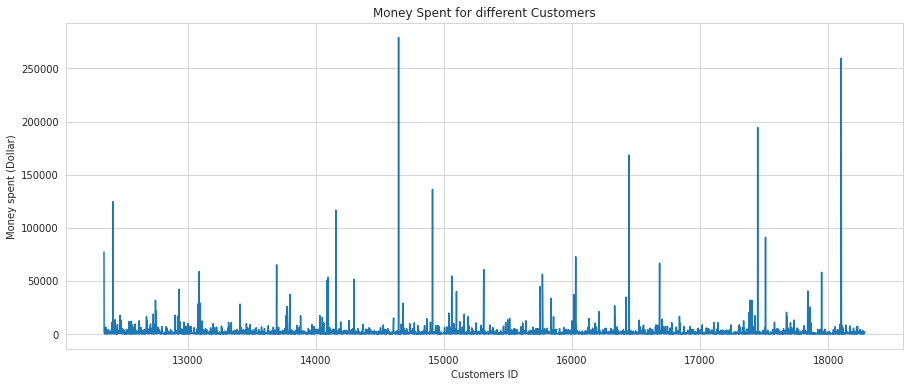

In [54]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### The TOP 5 most highest money spent

In [55]:
money_spent.sort_values(by='amount_spent', ascending=False).head()

,customer_id,country,amount_spent
1698,14646,Netherlands,279138.02
4206,18102,United Kingdom,259657.30
3734,17450,United Kingdom,194390.79
3015,16446,United Kingdom,168472.50
1888,14911,EIRE,136161.83


# Discover Patterns

Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)

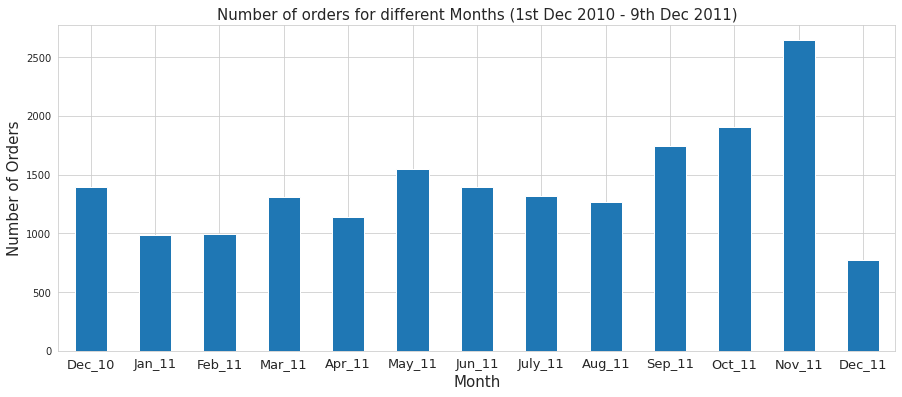

In [56]:
ax = df_new.groupby('invoice_num')['yearmonth'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

November looks like the month with most orders

## How many orders per day?

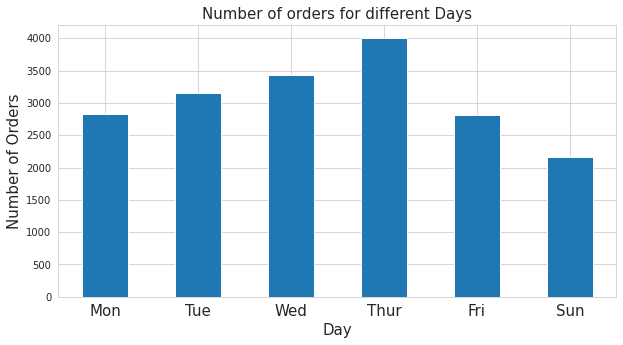

In [57]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

It looks like Thursday is the day with most orders

In [58]:
#ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
#ax.set_xlabel('Hour',fontsize=15)
#ax.set_ylabel('Number of Orders',fontsize=15)
#ax.set_title('Number of orders for different Hours',fontsize=15)
#ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
#plt.show()

# Discover Patterns for Unit Price

In [59]:
df_new.unit_price.describe()

count    391183.000000
mean          2.874130
std           4.284639
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: unit_price, dtype: float64

There are orders with 0 unit price (free items)

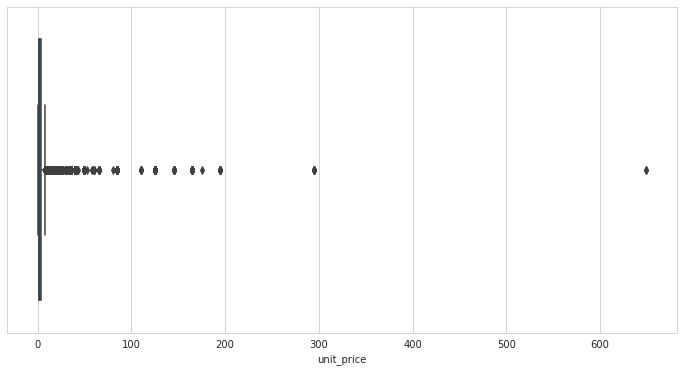

In [60]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

It looks like the majority of products have unit_price lower than 10. We will use 10 as a threshold value to deeper explore the unit_price.

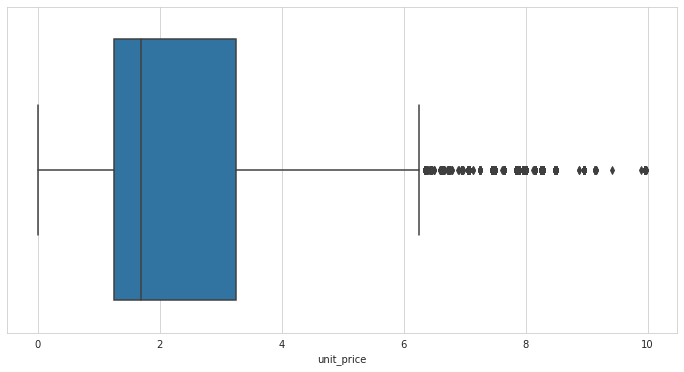

In [61]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new[df_new['unit_price'] < 10].unit_price)
plt.show()

In [62]:
df_free=df_new[df_new['unit_price'] == 0]
df_free.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
502122,578841,2011-11-25 15:57:00,201111,11,5,15,84826,asstd design 3d paper stickers,12540,0.0,0.0,13256,United Kingdom
86789,543599,2011-02-10 13:08:00,201102,2,4,13,84535B,fairy cakes notebook a6 size,16,0.0,0.0,17560,United Kingdom
187613,553000,2011-05-12 15:21:00,201105,5,4,15,47566,party bunting,4,0.0,0.0,17667,United Kingdom
446794,574920,2011-11-07 16:34:00,201111,11,1,16,23480,mini lights woodland mushrooms,1,0.0,0.0,13985,United Kingdom
480649,577314,2011-11-18 13:23:00,201111,11,5,13,23407,set of 2 trays home sweet home,2,0.0,0.0,12444,Norway


### How many free items are sold on each month?

In [63]:
df_free.yearmonth.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     5
201110     2
201111    11
Name: yearmonth, dtype: int64

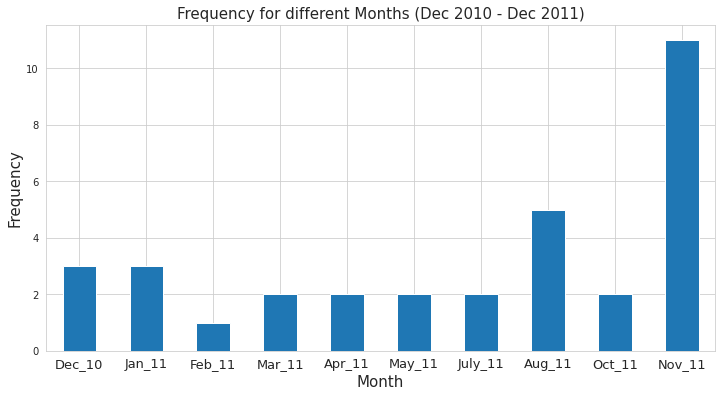

In [64]:
ax = df_free.yearmonth.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

On average, we see that the companies give 2 items for free each month. No free items were given on June 2011 and Sept 2011

# Discover Patterns for each Country

How many orders for each country?

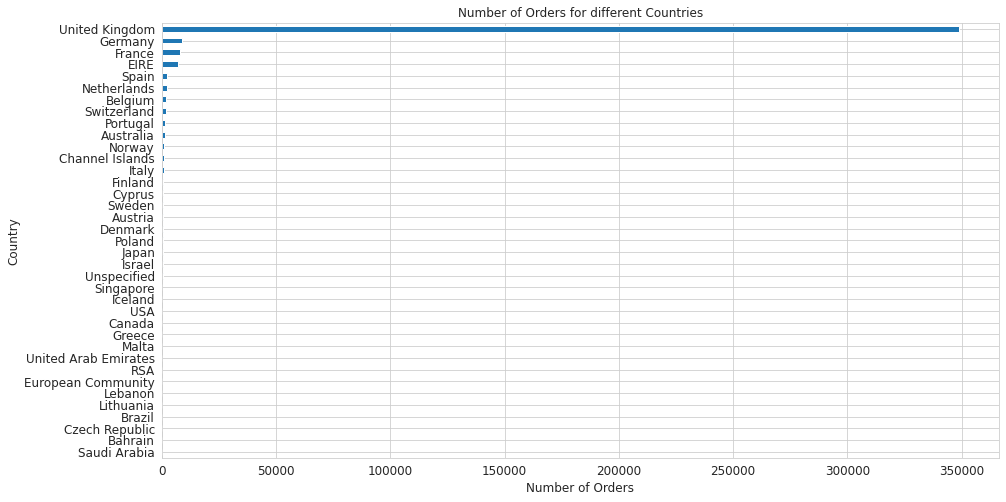

In [65]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

The company is based in UK, so it seems natural that the country with most sold items is UK.<br>
For further analysis, UK will be dropped

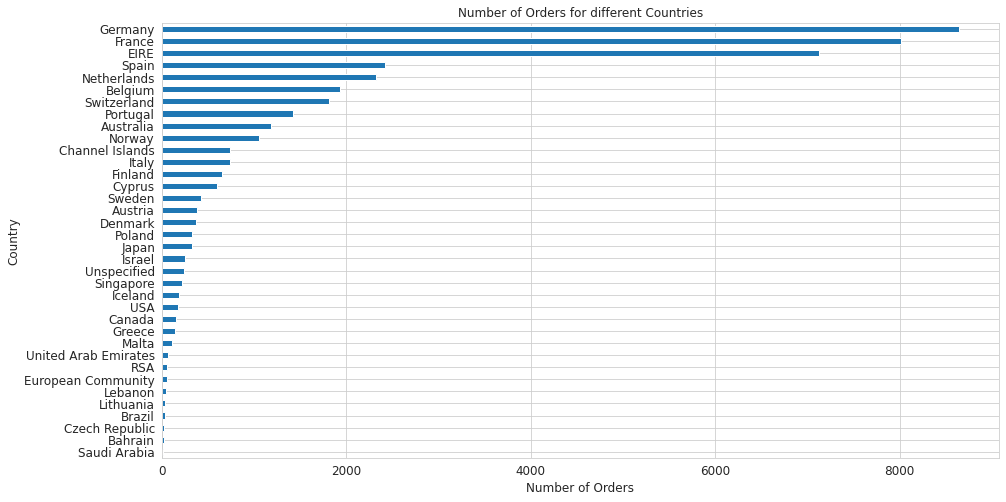

In [66]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Excluding the United Kingdom, Germany, France and EIRE are the two countries where customers spent the most money.

## How much money spent by each country?

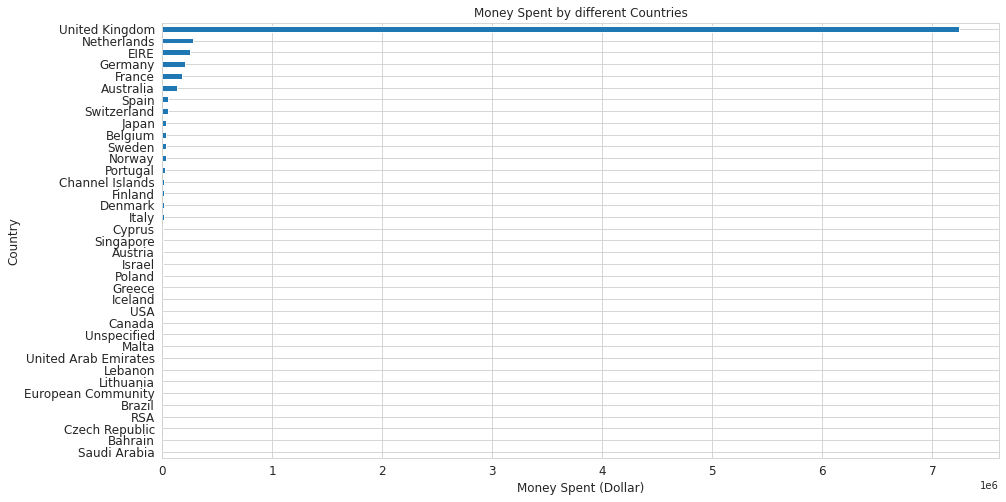

In [67]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

For similar reason as above, we will exclude UK for this analysis.

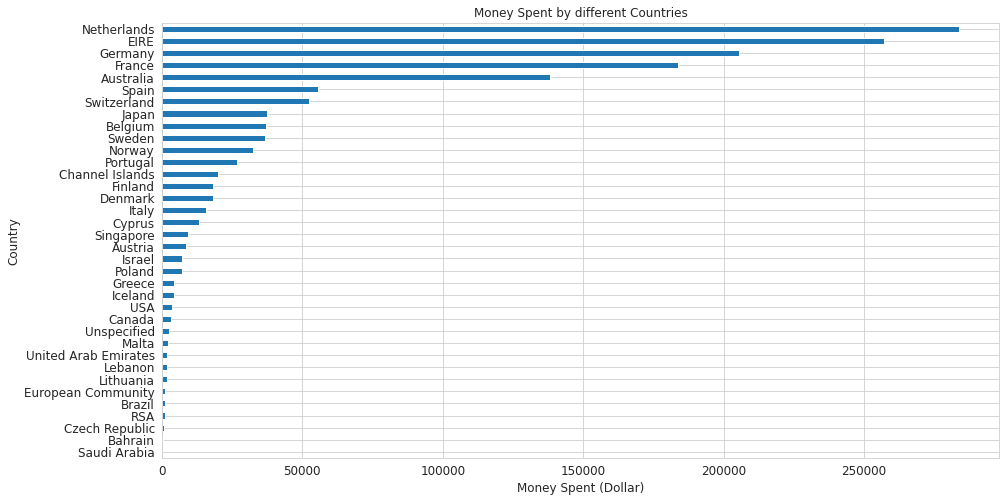

In [68]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']
# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Excluding the UK, customers from the Netherlands, EIRE, Germany, France and Australia spent the most money on the website.

# Sold product Analysis

In [69]:
df_new.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


In [70]:
df_new['stock_code'].nunique()

3659

There are 3659 different sold products in the dataset

## Which products are the most sold?

In [71]:
most_sold_products=df_new.groupby(by=['stock_code','description'])['quantity'].sum().sort_values(ascending=False).iloc[:50]
df_top_prod=most_sold_products.to_frame().reset_index()
df_top_prod.head()

,stock_code,description,quantity
0,23843,"paper craft , little birdie",80995
1,23166,medium ceramic top storage jar,77916
2,84077,world war 2 gliders asstd designs,54319
3,85099B,jumbo bag red retrospot,46078
4,85123A,white hanging heart t-light holder,36706


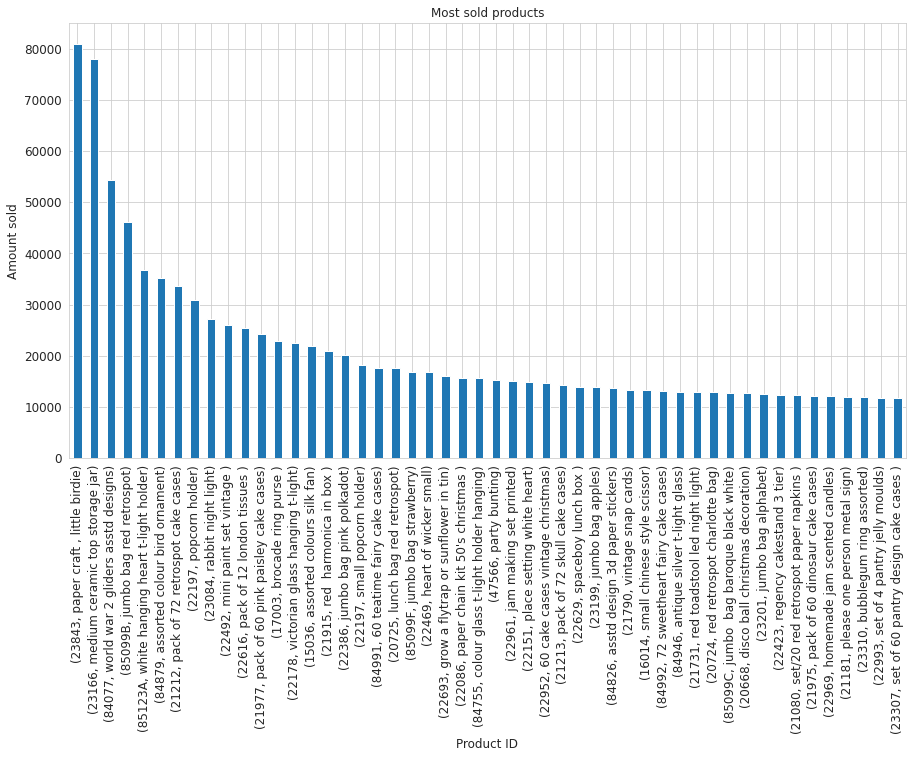

In [72]:
plt.subplots(figsize=(15,8))
most_sold_products.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Amount sold', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

# Most profitable products

### TOP 5 profitable products

In [73]:
most_profitable_product = df_new.groupby(by=['stock_code','description'])['amount_spent'].sum().sort_values(ascending=False).iloc[:50]
df_prof_prod = most_profitable_product.to_frame().reset_index().head()

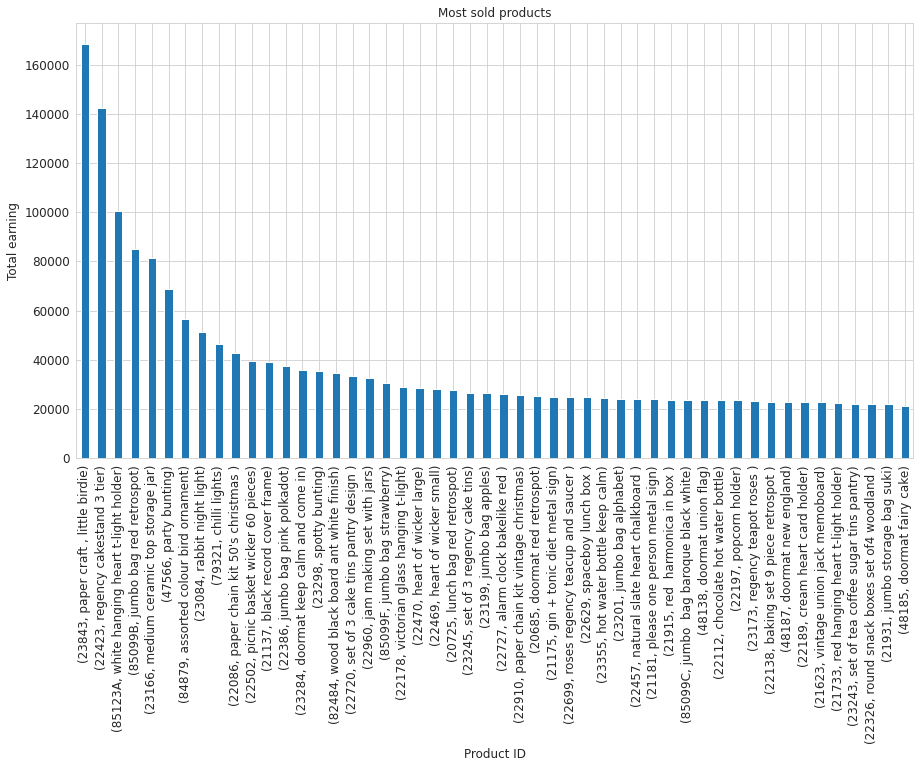

In [74]:
plt.subplots(figsize=(15,8))
most_profitable_product.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total earning', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

## How much does the price per unit relate to quantity?

In [75]:
df_new.reset_index().head()

,index,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
0,527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
1,193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
2,527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
3,532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
4,527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


In [76]:
df_3=df_new.drop_duplicates(subset=['stock_code','unit_price','description'])

In [77]:
df_3.sort_values(by=['stock_code','quantity'], inplace=True, ascending=False)
df_3.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom
527066,580691,2011-12-05 15:48:00,201112,12,1,15,90214V,"letter ""v"" bling key ring",12,0.29,3.48,13790,United Kingdom


### I will create a dictionary of dictionaries to include the unit price and quantities for each item

In [78]:
import collections

items_dict = collections.defaultdict(dict)

for product in df_3.iterrows():
    items_dict[product[1][6]][product[1][8]]=[product[1][9]][0]

In [79]:
df_4=pd.DataFrame(list(items_dict.items()),columns = ['stock_code','quantity_price'])
df_4.head()

,stock_code,quantity_price
0,90214Z,{12: 0.29}
1,90214Y,"{12: 0.29, 1: 1.25}"
2,90214W,{12: 0.29}
3,90214V,"{12: 0.29, 1: 1.25}"
4,90214U,{12: 0.29}


### Check the items with mutiple price per unit

In [80]:
df_5=df_4[df_4.quantity_price.apply(lambda x: len(x.keys())>1)]
df_5.head()

,stock_code,quantity_price
1,90214Y,"{12: 0.29, 1: 1.25}"
3,90214V,"{12: 0.29, 1: 1.25}"
7,90214R,"{12: 0.29, 1: 1.25}"
8,90214P,"{12: 0.29, 1: 1.25}"
10,90214N,"{12: 0.29, 2: 1.25}"


In [81]:
price_list=[]
for el in df_5.quantity_price:
    price_list.append(len(el.keys()))
df_5['counts']=price_list    
df_5=df_5.sort_values(by='counts', ascending=False)

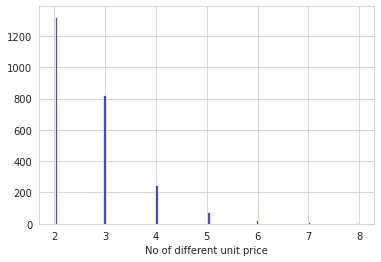

In [82]:
plt.hist(df_5['counts'], bins=100,color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('No of different unit price')
plt.show()

In [83]:
df_5['counts'].value_counts()

2    1323
3     824
4     251
5      74
6      23
7      11
8       4
Name: counts, dtype: int64

Excuding prodicts with just one unit_price, most of the products has 2 or 3 unit prices.

## How does the price change in relation to the purchased quantity?

Number:  1


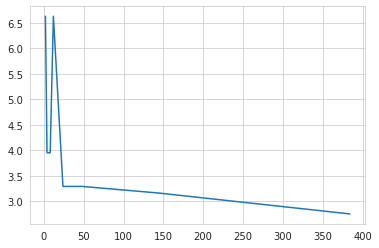

Number:  2


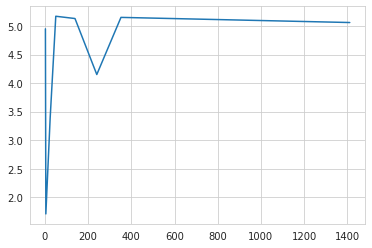

Number:  3


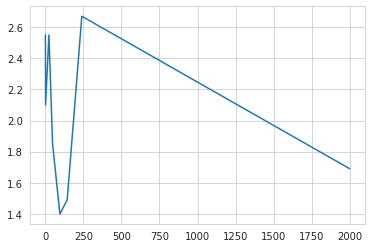

Number:  4


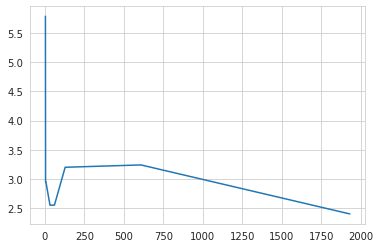

Number:  5


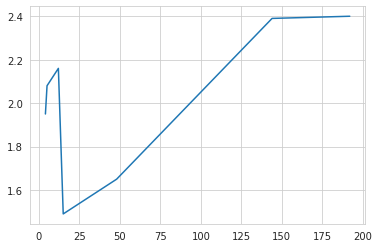

Number:  6


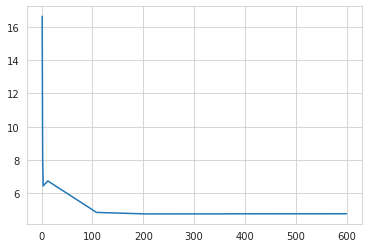

Number:  7


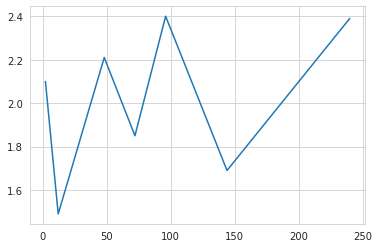

Number:  8


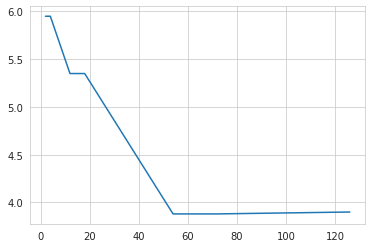

Number:  9


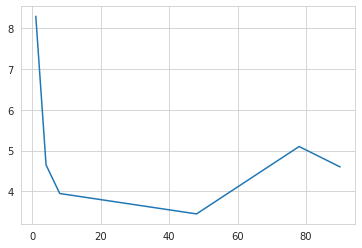

In [84]:
for i in range(1,10): #check first 10 products ordered by the quantity of different unit prices
    print('Number: ', i)
    keys=list(df_5.iloc[i-1:i].quantity_price.values[0].keys())
    values=list(df_5.iloc[i-1:i].quantity_price.values[0].values())
    plt.plot(keys, values)
    plt.show()

These plots shows that generally the unit price decresases with increasing quantity with some exceptions.

# Time series analysis for top sold products

In [85]:
#most sold products dataframe
df_top_prod.head()

,stock_code,description,quantity
0,23843,"paper craft , little birdie",80995
1,23166,medium ceramic top storage jar,77916
2,84077,world war 2 gliders asstd designs,54319
3,85099B,jumbo bag red retrospot,46078
4,85123A,white hanging heart t-light holder,36706


In this dataframe the quantity is the sum of all the sold quantites for each products. We need all tha single transactions related to these top psold products.

In [86]:
#check the number of transactions related to these top sold products
df_top_50 = df_new[df_new['description'].isin(df_top_prod['description'])]
df_top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33758 entries, 131386 to 291180
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_num   33758 non-null  object        
 1   invoice_date  33758 non-null  datetime64[ns]
 2   yearmonth     33758 non-null  int64         
 3   month         33758 non-null  int64         
 4   day           33758 non-null  int64         
 5   hour          33758 non-null  int64         
 6   stock_code    33758 non-null  object        
 7   description   33758 non-null  object        
 8   quantity      33758 non-null  int64         
 9   unit_price    33758 non-null  float64       
 10  amount_spent  33758 non-null  float64       
 11  customer_id   33758 non-null  int64         
 12  country       33758 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 3.6+ MB


In [87]:
print('The top 50 most old products account for the {} % of the total transactions'.format(np.round(len(df_top_50)/len(df_new),2)))

The top 50 most old products account for the 0.09 % of the total transactions


In [88]:
df_top_50.stock_code.value_counts()

85123A    2016
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1303
22197     1060
21212     1050
22086     1003
22469      979
22386      884
22993      881
22961      870
23084      823
22178      819
23201      757
20724      748
21080      746
21790      731
23199      724
22629      709
21181      705
21977      676
84991      672
85099C     656
85099F     656
21915      564
21975      543
84946      537
84755      530
21731      528
22969      518
23307      516
84992      515
21213      505
22952      479
84077      472
22616      392
15036      325
22492      325
22151      296
22693      239
23310      214
17003      208
23166      198
20668      184
16014       54
84826       33
23843        1
Name: stock_code, dtype: int64

### There are indeed lots of transactions related to these top sold products

It could be interesting to see how the product with stock code '23843' is in the top 50 with just 1 transaction

In [89]:
df_new[df_new['stock_code'] == '23843']

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
540421,581483,2011-12-09 09:15:00,201112,12,5,9,23843,"paper craft , little birdie",80995,2.08,168469.6,16446,United Kingdom


This transaction is related to the most sold product.

In [90]:
#most profitable products
df_prof_prod.head()

,stock_code,description,amount_spent
0,23843,"paper craft , little birdie",168469.60
1,22423,regency cakestand 3 tier,142264.75
2,85123A,white hanging heart t-light holder,100392.10
3,85099B,jumbo bag red retrospot,85040.54
4,23166,medium ceramic top storage jar,81416.73


In [91]:
df_top_50[df_top_50['stock_code'].isin(df_prof_prod.stock_code)].stock_code.value_counts()

85123A    2016
22423     1714
85099B    1615
23166      198
23843        1
Name: stock_code, dtype: int64

The top 5 most profitable products with a number of transaction higher than 1000, have the 'stock code' : 85123A, 22423, 85099B

In [92]:
df_top1 = df_new[df_new['stock_code'] == '85123A']
df_top2 = df_new[df_new['stock_code'] == '22423']
df_top3 = df_new[df_new['stock_code'] == '85099B']

Text(0.5, 1.0, 'Sales per day for the Most sold product')

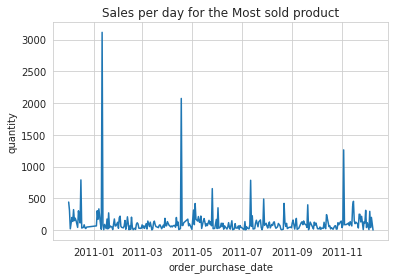

In [93]:
# creating a purchase day feature
df_top1['order_purchase_date'] = df_top1.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top1.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Most sold product')

There are indeed some peaks in quantity sold for these product.

Text(0.5, 1.0, 'Sales per day for the Second most sold product')

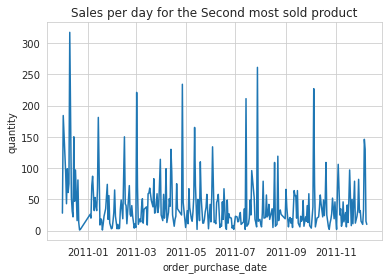

In [94]:
# creating a purchase day feature
df_top2['order_purchase_date'] = df_top2.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top2.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Second most sold product')

Text(0.5, 1.0, 'Sales per day for the Third most sold product')

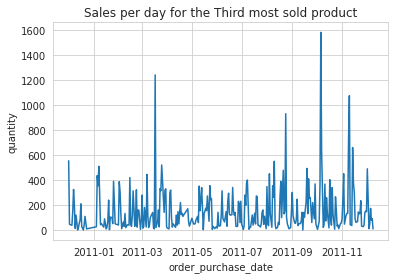

In [95]:
# creating a purchase day feature
df_top3['order_purchase_date'] = df_top3.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top3.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Third most sold product')

These plots do not show a clear pattern in the data. It could be interesting to try to predict the future sales.